# Analyze RiverFlood Hazard from netCDF file

Files: https://files.isimip.org/cama-flood/results/

Help for analyzing netCDF files: https://github.com/Unidata/netcdf4-python/blob/master/examples/reading_netCDF.ipynb

In [63]:
#Choices
n_year = 83
#hist: 0 to 145 (1861 to 2006)
#others: 0 to 94 (2006 to 2100)

In [64]:
#RiverFlood hazard file source
dph_choice = ['../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
frc_choice = ['../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85

In [65]:
#generating RiverFlood hazard from netCDF file
import netCDF4
fp_flddph_hist=dph_choice[0]
fp_flddph_rcp26=dph_choice[1]
fp_flddph_rcp60=dph_choice[2]
fp_flddph_rcp85=dph_choice[3]
nc_flddph_hist = netCDF4.Dataset(fp_flddph_hist)
nc_flddph_rcp26 = netCDF4.Dataset(fp_flddph_rcp26)
nc_flddph_rcp60 = netCDF4.Dataset(fp_flddph_rcp60)
nc_flddph_rcp85 = netCDF4.Dataset(fp_flddph_rcp85)
#print(nc_flddph_hist)
fp_fldfrc_hist=frc_choice[0]
fp_fldfrc_rcp26=frc_choice[1]
fp_fldfrc_rcp60=frc_choice[2]
fp_fldfrc_rcp85=frc_choice[3]
nc_fldfrc_hist = netCDF4.Dataset(fp_fldfrc_hist)
nc_fldfrc_rcp26 = netCDF4.Dataset(fp_fldfrc_rcp26)
nc_fldfrc_rcp60 = netCDF4.Dataset(fp_fldfrc_rcp60)
nc_fldfrc_rcp85 = netCDF4.Dataset(fp_fldfrc_rcp85)
#print(nc_fldfrc_hist)

In [66]:
print(nc_flddph_hist.variables.keys())

dict_keys(['time', 'lat', 'lon', 'flddph'])


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
time = nc_flddph_rcp26.variables['time']
lat = nc_flddph_rcp26.variables['lat']
lon = nc_flddph_rcp26.variables['lon']
print('shape of time variable: %s' % repr(time.shape))
print('shape of lat variable: %s' % repr(lat.shape))
print('shape of lon variable: %s' % repr(lon.shape))
X, Y = np.meshgrid(lon, lat)
var_rcp26 = nc_flddph_rcp26.variables['flddph']
print('shape of flddph variable: %s' % repr(var_rcp26.shape))
var_rcp85 = nc_flddph_rcp85.variables['flddph']
print('shape of flddph variable: %s' % repr(var_rcp85.shape))

shape of time variable: (95,)
shape of lat variable: (4320,)
shape of lon variable: (8640,)


shape of flddph variable: (95, 4320, 8640)
shape of flddph variable: (95, 4320, 8640)


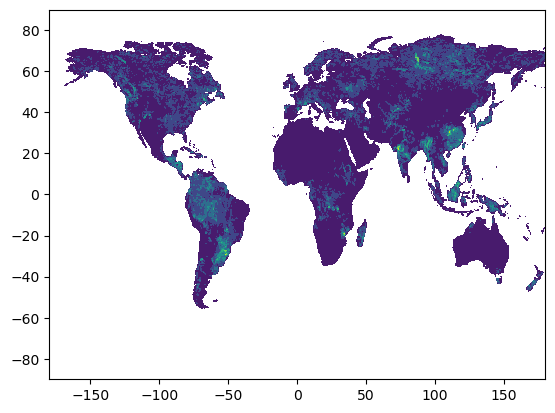

In [69]:
mapdph_rcp26 = plt.contourf(X, Y, var_rcp26[n_year, :, :])

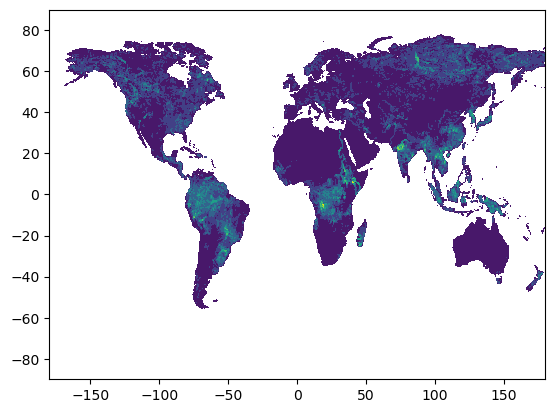

In [70]:
mapdph_rcp85 = plt.contourf(X, Y, var_rcp85[n_year, :, :])

In [71]:
time = nc_fldfrc_rcp26.variables['time']
lat = nc_fldfrc_rcp26.variables['lat']
lon = nc_fldfrc_rcp26.variables['lon']
print('shape of time variable: %s' % repr(time.shape))
print('shape of lat variable: %s' % repr(lat.shape))
print('shape of lon variable: %s' % repr(lon.shape))
X, Y = np.meshgrid(lon, lat)
var_rcp26 = nc_fldfrc_rcp26.variables['fldfrc']
print('shape of flddph variable: %s' % repr(var_rcp26.shape))
var_rcp85 = nc_fldfrc_rcp85.variables['fldfrc']
print('shape of flddph variable: %s' % repr(var_rcp85.shape))

shape of time variable: (95,)
shape of lat variable: (4320,)
shape of lon variable: (8640,)
shape of flddph variable: (95, 4320, 8640)
shape of flddph variable: (95, 4320, 8640)


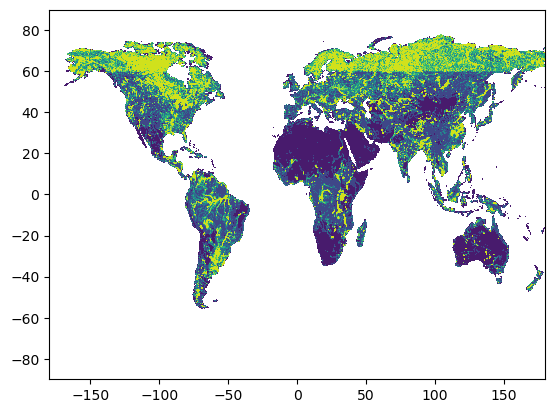

In [72]:
mapfrc_rcp26 = plt.contourf(X, Y, var_rcp26[n_year, :, :])

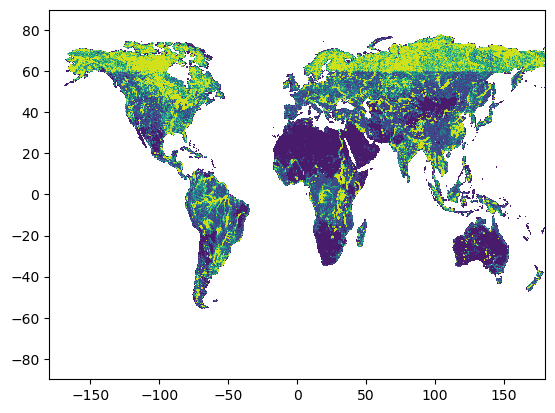

In [73]:
mapfrc_rcp85 = plt.contourf(X, Y, var_rcp85[n_year, :, :])